<a href="https://colab.research.google.com/github/Preethi-96/ImageProcessing/blob/master/DatFile_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image
import numpy as np
import cv2

In [14]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(480,640,3),))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering='tf'))

model.add(Conv2D(32,(3,3),input_shape=(480,640,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering='tf'))

model.add(Conv2D(64,(3,3),input_shape=(480,640,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering='tf'))

model.add(Dense(64))
model.add(Flatten())
model.add(Dense(2))
model.add(Dropout(0.5))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
  if sys.path[0] == '':


In [ ]:
# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
import os
os.chdir('/content/drive/My Drive')
Filenames=os.listdir('/content/drive/My Drive/train')
print(Filenames)


['Dat3', 'Dat1']


In [16]:
import os
#os.chdir(r'D:\Laser Polishing')

batch_size=10

train_path = r'/content/drive/My Drive/train'
valid_path = r'/content/drive/My Drive/valid'
test_path = r'/content/drive/My Drive/test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

#testgen = ImageDataGenerator()


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=r'/content/drive/My Drive/train', target_size=(480,640), classes=['Dat1', 'Dat3'], class_mode='categorical', batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=r'/content/drive/My Drive/valid', target_size=(480,640), classes=['Dat1', 'Dat3'], class_mode='categorical', batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=r'/content/drive/My Drive/test', target_size=(480,640), classes=['Dat1', 'Dat3'], class_mode='categorical', batch_size=10, shuffle=False)


Found 802 images belonging to 2 classes.
Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


Epoch 1/5
20/20 [==============================] - 100s 5s/step - loss: 4.8359 - accuracy: 0.5200 - val_loss: 4.7787 - val_accuracy: 0.5125
Epoch 2/5
20/20 [==============================] - 93s 5s/step - loss: 4.6362 - accuracy: 0.4688 - val_loss: 6.2603 - val_accuracy: 0.4875
Epoch 3/5
20/20 [==============================] - 94s 5s/step - loss: 4.6467 - accuracy: 0.5200 - val_loss: 12.7122 - val_accuracy: 0.4583
Epoch 4/5
20/20 [==============================] - 93s 5s/step - loss: 4.1609 - accuracy: 0.4900 - val_loss: 8.0590 - val_accuracy: 0.4750
Epoch 5/5
20/20 [==============================] - 91s 5s/step - loss: 4.3635 - accuracy: 0.5417 - val_loss: 4.8354 - val_accuracy: 0.5625


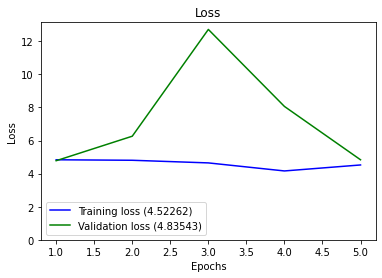

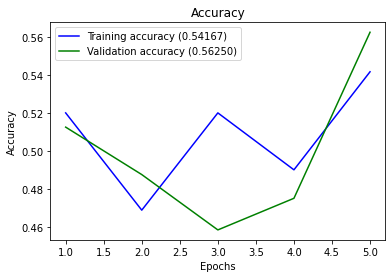

In [17]:
 import keras
 
 model.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])
batch_size=10
m=model.fit_generator(train_batches, steps_per_epoch=200//batch_size,epochs=5,validation_data=valid_batches,validation_steps=80//batch_size)
# callbacks=[
#  keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
#  keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),
#  ])

import matplotlib.pyplot as plt
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    #plt.xlim(xmin=0)
    plt.ylim(ymin=0)
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    #plt.ylim(0, 1)    
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#import above function and pass the parameter used while training    
plot_history(m)    

In [18]:
print(len(test_batches))
predictions=model.predict_generator(test_batches, steps=80)

21


In [19]:
print(predictions)
loss,accuracy = model.evaluate(test_batches,verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
predicted_class_indices = np.argmax(predictions,axis=1)

[[0.9999966  0.        ]
 [0.99998635 0.        ]
 [0.99998367 0.        ]
 ...
 [0.9999952  0.        ]
 [0.9999918  0.        ]
 [0.99998534 0.        ]]
21/21 [==============================] - 25s 1s/step
Test: accuracy = 0.500000  ;  loss = 16.118095
